Let us begin our tutorial on scipy. Scipy is an extremely useful tool for numerical analysis because it is built to handle a number of numerical methods, such as integration, interpolation, Fourier transforms, and linear algebra as a whole. Let us jump in!

In [2]:
import numpy as np
import scipy
import matplotlib as plt

Let us begin with a guide to integration. This topic itself is so broad that I cannot even begin to cover all of it, but this should give you a basis from which you can learn more. Let us begin by using the quad() function which is a standard function in scipy for single-variable integration.

In [3]:
'''
This is the function that we would like to integrate.
'''

def integrand(x, a, b, c):
     return a*x**2 - b*x + c

In [4]:
from scipy.integrate import quad

a = 1
b = 2
c = 3

I = quad(integrand, 0, 1, args=(a,b,c))

In [5]:
print(I)

(2.3333333333333335, 2.590520390792032e-14)


The first number (I[0]) is the answer to the integral. The second number (I[1]) is an estimate of the absolute error of the integration. Want more information on what is going on? Use the following:

In [6]:
scipy.integrate.quad_explain() 


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
        In the call forms with ``xx``,  ``n`` is the length of the ``xx``
        array which contains ``xx[0] == x`` and the rest of the items are
        numbers contained in the ``ar

This is how the quad() function works: For finite integration limits, the integration is performed using a Clenshaw-Curtis method which uses Chebyshev moments. If one of the integration limits is infinite, then a Fourier integral is computed. This may well make no sense to you at this time, but we shall soon go over the basics of what this means in the content of other numerical methods.

One can use nquad() to do multivariable integration: Let us integrate the function between the limits of 0 and infinity, and 1 and infinity w.r.t to t and x.

In [7]:
def f(t, x):
      return np.exp(-x*t) / t**N

N = 5
scipy.integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986131e-08)

For clarity, the functions dblquad() and tplquad() are designed for double and triple integration, whereas nquad() can handle integration to order n.

There are other approximation methods that can be used with the scipy library. In particular, you are probably familar with the Trapezoidal method (approximating the area under the curve as a trapezoid) and Simpson's method (approximating the area under the curve with parabolas. They can be calculated using the functions trapz() and simps() respectively. Let us look at the same original function to see how it compares:

In [23]:
from scipy.integrate import trapz
import matplotlib.pyplot as plt

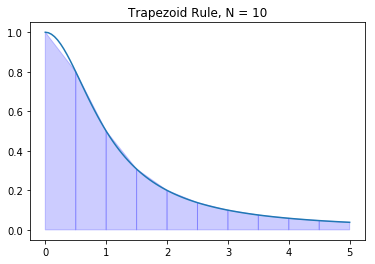

In [24]:
# Credit to https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/
# for this code.

f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

In [26]:
T = trapz(y,x)
print(T)

1.3731040812301096


Let's do the same thing with Simpson's Rule:

In [27]:
# Don't forget to import the function from scipy!
from scipy.integrate import simps

S = simps(y,x)
print(S)

1.371454008759302


And finally for comparison:

In [30]:
I = np.arctan(5)
print(I)

1.373400766945016


To be added: Gaussian Quadrature, Romberg Integration, linalg